1\. **Kernel Density Estimate**

From Wikipedia: in statistics, kernel density estimation (KDE) is a non-parametric way to estimate the probability density function of a random variable. Kernel density estimation is a fundamental data smoothing problem where inferences about the population are made, based on a finite data sample.

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.ticker import MaxNLocator
from scipy.stats import norm

0.6984390073616242 1.2996371160921296
800
The normalization constant is 33.27688842924164


Text(0, 0.5, 'f(x)')

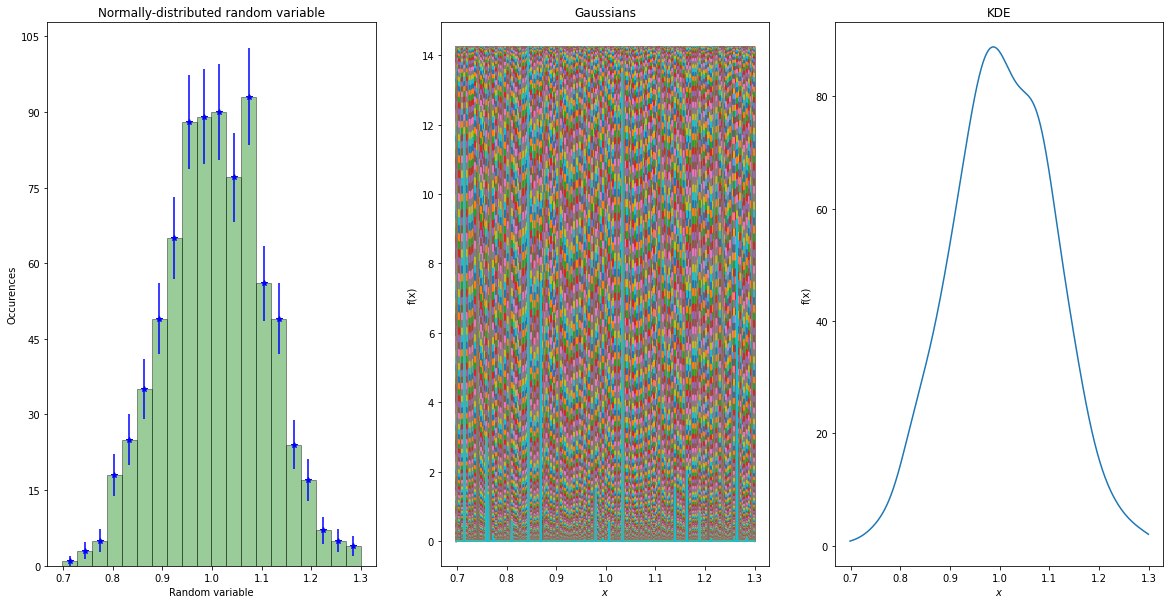

In [40]:
#EXERCISE 1: Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, 
#with a given mean a standard deviation
N=300
mean=1.0
std_dev=0.1

x=np.random.normal(mean,std_dev,N)
#print(x[:20])


#aestheticism histogram
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3,figsize=(20, 10))

#ax1
n,bins,patches=ax1.hist(x, bins="auto", histtype='bar', color="green", ec='black', alpha=0.4) 
#ec:=edge color, alpha percentage of "deep green"
#print(n, "\n", bins, "\n", patches) #n:=counts of each bin// bins:= edges// patches
bin_avg=(bins[:-1] + bins[1:])/2.

#print(bin_avg) #has 24 values
err_n=np.sqrt(n)

ax1.errorbar(bin_avg,n,yerr=err_n, fmt="*",color="blue")
ax1.set_title('Normally-distributed random variable')
ax1.set_xlabel("Random variable")
ax1.set_ylabel('Occurences')
ax1.yaxis.set_major_locator(MaxNLocator(integer=True)) #to vi

#ax2
#for every element of x, create a gaussian with 
#the mean corresponding the element value and std as a parameter that can be tuned.
gauss_list=[]
points=np.linspace(x.min(), x.max(),N) #return N points evenly-spaced
print(x.min(), x.max())
#print(x.std(),len(x), print(stddev))
    
for item in x:
    stddev=1.06*x.std()*x.size**(-0.2)
    gauss=norm.pdf(points,item,stddev) #gauss of N-points, mean=item, std=stddev
    gauss_list.append(gauss)

#print(len(gauss))
#for i in range(2): print(gauss_list[i][:1]) #plot onyl 2nd element
    
#print(points, "\n", len(gauss_list))
#ax2.plot(points, gauss_list[0]) #gauss_list is a list of list
ax2.plot(points, gauss_list)
ax2.set_title('Gaussians')
ax2.set_xlabel("$x$")
ax2.set_ylabel('f(x)')

#now find the normalization constant
#area_hist=area_gauss/norm_const
norm_const=np.trapz(np.sum(gauss_list,axis=0),points)/np.trapz(n,x=bin_avg) #A_tr = (b+B)*h/2
print("The normalization constant is", norm_const)

ax3.plot(points, np.sum(gauss_list,axis=0)/norm_const) #sum over clmn

#ax3.errorbar(bin_avg,n,yerr=err_n, fmt="o",color="red")
#line above useful to check pattern
ax3.set_title('KDE')
ax3.set_xlabel("$x$")
ax3.set_ylabel('f(x)')

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

In [3]:
"""! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')"""


"! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png\nfrom IPython.display import Image\nImage('two_categories_scatter_plot.png')"

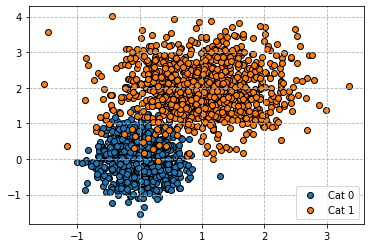

<ipython-input-30-387342611ca8>:14: RuntimeWarning: covariance is not positive-semidefinite.
  twod_gauss=np.random.multivariate_normal(mean[i,:], std[i,:,:], N[i])


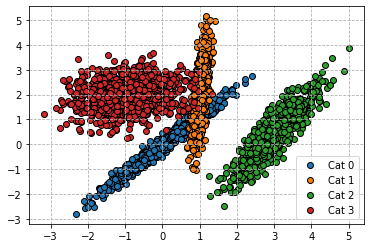

In [30]:
#EXERCISE 2

#To fix ideas
#mean: [[x1,y1],...,[xn,yn]]
#std_dev: [[[x1x1,x1y1], [y1x1,y1y1]], ...]
#N: [N1,...,Nn] number of samples
#n: number of categories

import numpy as np

def twodim_gauss(mean,std,N,n):
    gauss_list=[]
    for i in range(n):
        twod_gauss=np.random.multivariate_normal(mean[i,:], std[i,:,:], N[i])
        #print(std[i,:,:]) #std is a 2x2-matrix: the i select the matrix then select the element
        gauss_list.append(twod_gauss)   
        #plt.plot(x,gauss_list)
    return gauss_list

#2 categories
N=[1000,1000]
n=2
mean=np.array([[0,0],[1,2]])
std_dev=np.array([[[0.1,0],[0,0.2]] , [[0.5,0],[0,0.5]]]) #we take them uncorrelated: xy=yx=0

gaussian=twodim_gauss(mean,std_dev,N,n)
#plt.hist(gaussian[0][:,0], 100) 
#or plt.hist(gaussian[0][:.0], bins=bin_list) with bin_list = np.linspace(min_edge, max_edge, N+1)

for i in range(n):
    plt.scatter(x=gaussian[i][:,0], y=gaussian[i][:,1], marker='o', edgecolor='black', label="Cat "+str(i))
    plt.grid(linestyle="--", alpha=1)
    plt.legend(loc="best")
plt.show()    
    
#just to see with 4 categories 
n=4
N=[1000]*n
mean=np.array([[0,0],[1,2],[3,0.5],[-1,2]])
std_dev=np.array([np.random.rand(2,2),np.random.rand(2,2),np.random.rand(2,2),np.random.rand(2,2)])

gaussian2=twodim_gauss(mean,std_dev,N,n)

for i in range(n):
    plt.scatter(x=gaussian2[i][:,0], y=gaussian2[i][:,1], marker='o',edgecolor='black', label="Cat "+str(i))
    plt.grid(linestyle="--", alpha=1)
    plt.legend(loc="best")
    
#or
n=3
plt.figure(figsize=(10,10))
for i in range(n):
    mean=np.random.rand(2,)*8-4
    cov=np.array([[1,0] , [0,1]])*0.5
    x=np.random.multivariate_normal(mean, cov, 1000).T
    plt.scatter(x[0],x[1])

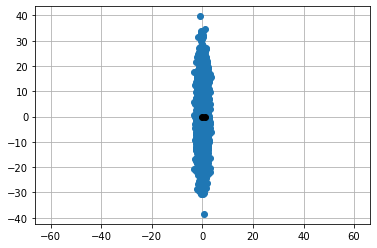

In [24]:
#Give a Multivatiate_normal a shot!
mean = [0, 0]
cov = [[1, 0], [0, 100]]  # diagonal covariance
import matplotlib.pyplot as plt
x, y = np.random.multivariate_normal(mean, cov, 5000).T
plt.plot(x, y, 'o')
plt.plot(mean, "ok")
plt.grid()
plt.axis('equal')

plt.show()

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should `np.load()` function to load the file as a numpy array and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

[ 1.1        -1.95       -7.2        ...  0.08333333  0.16666667
  0.08333333]

 LINEAR REGRESSION WITH SCIPY
slope = 0.0032597701220305813
intercept = -0.1543281676306947
r_value = 0.04340351052255907
pvalue = 8.717037183576494e-06
std_err = 0.0007327014008445789


Under sns.regplot


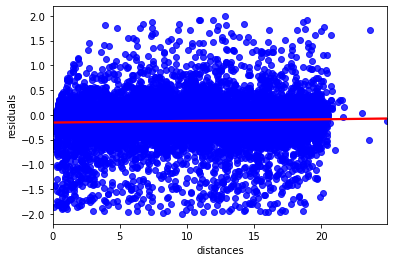

In [57]:
#EXERCISE 3
from scipy.stats import linregress

#PB HERE!!!: how may i access "residuals" only? #print(file.item(), type(file))

file=np.load("residuals_261.npy", allow_pickle=True).item() #.item() since i need a 2D-dic
#for it in file: print(file[it]); break #to plot only values of 1 key
dataset = pd.DataFrame(file)
#print(dataset)
# Clean the dataset
dataset = dataset[abs(dataset["residuals"]) < 2]
#print(dataset.describe())

# linear regression with scipy
slope, intercept, r_value, p_value, std_err = linregress(x=dataset["distances"], y=dataset["residuals"])
print("\n LINEAR REGRESSION WITH SCIPY")
print("slope =", slope)
print("intercept =", intercept)
print("r_value =", r_value)
print("pvalue =", p_value)
print("std_err =", std_err)
print("\n")

print("Under sns.regplot")
#tips = sns.load_dataset("residuals_261.npy")
sns.regplot(x="distances", y="residuals", data=dataset, 
            scatter_kws={"color": "blue"}, line_kws={"color": "red"});

LINEAR REGRESSION WITH SEABORN


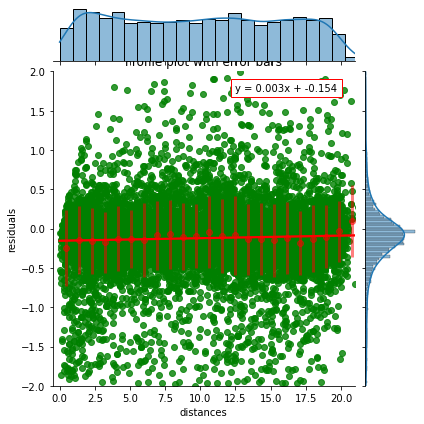

In [101]:
#linear regression with seaborn
print("LINEAR REGRESSION WITH SEABORN")
plot=sns.jointplot(x="distances", y="residuals", data=dataset, kind="reg", xlim=[-0.5, 21], ylim=[-2,2], 
                   joint_kws={'line_kws':{'color':'red'},"scatter_kws":{"color": "green"}})

#bbox
plt.text(x=12.5, y=1.75, s="y = {0:.3f}x + {1:.3f}".format(slope, intercept), bbox=dict(ec='red',fc="white"))
#EdgeColour, FaceColour

#filling the np arrays
_, bins = np.histogram(dataset["distances"], bins="auto")
x = []
for i in range (len(n)):
    x.append(0.5*(bins[i+1]+bins[i])) #center is the average of the two extremes
    
# add a column (to be filled) indicating the bin number
dataset["bin"] = ""

#fill the "bin"-column with counts

#print(dataset["distances"])
for i in range(len(x)):   #len(x)=len(n)=27
    mask = (bins[i] < dataset["distances"]) & (dataset["distances"] < bins[i+1])
    #print(bins[i], bins[i+1]); print(mask)
    dataset.loc[mask, "bin"] = i #set (dataset @ loc[row, clmn]) = i

#find y=mean and error bar
#group by "bin" and take the avg among them -> select only resid values
y = dataset.groupby("bin").mean()["residuals"].values
err_y = dataset.groupby("bin").std()["residuals"].values
plt.errorbar(x,y,yerr=err_y,linewidth=3,fmt='ro', alpha=0.5)
plt.title("Profile plot with error bars")
plt.show()

The results with *scipy* are in fact the same as the ones with *seaborn*.